In [54]:
import glob
import cv2
import json
import matplotlib.pyplot as plt

In [55]:
base_path = '2021-09-09'
annotations_path = f'{base_path}/instances_combined.json'
images_path = f'{base_path}/imgs'

In [56]:
with open(annotations_path, 'r') as f:
    annotations_json = json.load(f)
category_id_to_name = {cat['id']: cat['name'] for cat in annotations_json['categories']}
imgs = glob.glob(f'{images_path}/*')

In [57]:
img_idx = 0    

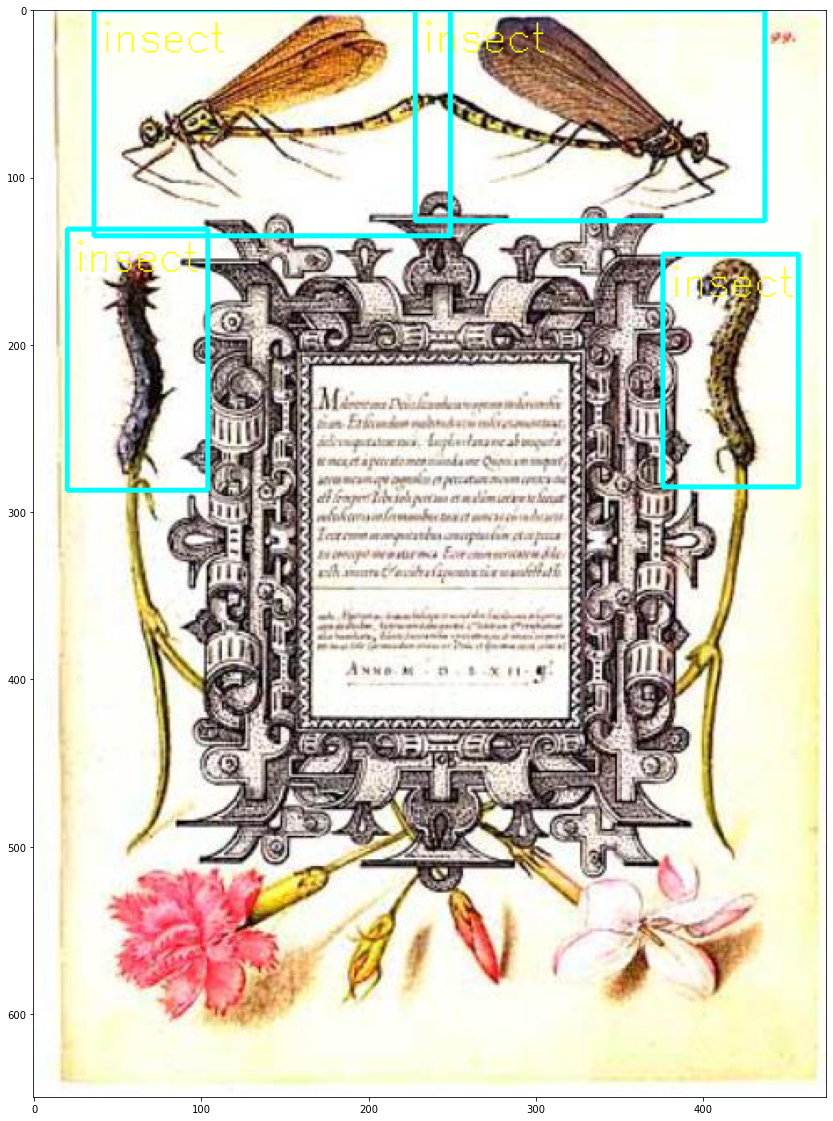

In [59]:
cur_img = annotations_json['images'][img_idx]
img_path = f'{images_path}/{cur_img["file_name"]}'
cur_anns = [ann for ann in annotations_json['annotations'] if ann['image_id'] == cur_img['id']]

img = cv2.imread(f'{images_path}/{cur_img["file_name"]}')
for ann in cur_anns:
    [x,y,w,h] = ann['bbox']
    name = category_id_to_name[ann['category_id']]
    img = cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (255,255,0), 2)
    img = cv2.putText(img, name, (int(x) + 5, int(y) + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 1)
plt.figure(figsize=(20,20))
plt.imshow(img[:,:,::-1], aspect='equal')
img_idx += 1